# WEB SCRAPING AND DATA ANALYSIS

***

📌 **ABOUT THIS PROJECT**

"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."

<img class="thumb image-max-width loaded" data-pin-no-hover="true" src="https://image.freepik.com/free-vector/experts-concept-illustration_114360-451.jpg" width="626" height="417" alt="Experts concept illustration Free Vector" data-real-image="https://image.freepik.com/free-vector/experts-concept-illustration_114360-451.jpg" data-src="https://img.freepik.com/free-vector/experts-concept-illustration_114360-451.jpg?size=338&amp;ext=jpg" style="width:626px">

## LIBS

In [1]:
import re
import bs4
import spacy
import string
import unidecode

import pandas              as pd
import numpy               as np
import seaborn             as sns
import urllib.request      as urllib_request
import matplotlib.pyplot   as plt

from urllib.request       import Request, urlopen
from urllib.error         import URLError, HTTPError
from collections          import Counter
from datetime             import date
from bs4                  import BeautifulSoup
from matplotlib           import gridspec
from wordcloud            import WordCloud
from spacy.matcher        import PhraseMatcher
from IPython.core.display import HTML


# FUNCTIONS

In [2]:
def plot_words(var):
    for f in df[var].unique():
        f = str(f)  
        if f != 'nan':
            aux = df[df[var] == f]

            text = aux['descricao_vaga'].tolist()
            text = ' '.join(text) # data format to generate word cloud
            
            # most common words
            most_commonWords = Counter(" ".join(aux["descricao_vaga"]).split()).most_common(100)
            most_commonWords = pd.DataFrame(most_commonWords, columns = ['word', 'count'])

            # plot chart
            fig = plt.figure(figsize=(30, 20))
            gs1 = gridspec.GridSpec(3, 3)
            gs1.update(left=0.05, right=0.50, wspace=0.20)
            ax1 = plt.subplot(gs1[-1, :-1])
            
            wordcloud = WordCloud(max_font_size = 50,background_color = 'white').generate(text) #word cloud
            plt.imshow(wordcloud, interpolation = 'bilinear')
            plt.title('Words Cloud - {}'.format(f), pad = 25)
            sns.despine(bottom = True, left = True)
            plt.axis('off')

            ax2 = plt.subplot(gs1[-1, -1])
            sns.barplot(data = most_commonWords[0:20], y = 'count', x = 'word', palette = 'viridis') #barplot
            plt.title('Most Common Words - {}'.format(f), pad = 25)
            plt.xticks(rotation = 90)
            sns.despine(bottom = True)
            ax2.xaxis.label.set_visible(False)
            ax2.yaxis.label.set_visible(False)

## DATASET

In [3]:
df = pd.read_csv('cleaned_data4.csv', sep = ';',  encoding = 'latin-1')
df.head()

posicao_vaga nivel  \
0           ENGENHARIA DE DADOS   NaN   
1  ADMINISTRACAO BANCO DE DADOS   NaN   
2              ANALISE DE DADOS   NaN   
3           ENGENHARIA DE DADOS   NaN   
4              ANALISE DE DADOS   NaN   

                                      descricao_vaga  
0    engenheiro(a dados capaz criar expandir otim...  
1    criar modelo dados conceitual lógico físico ...  
2    utilizar habilidades conhecimentos especiali...  
3    analisar criar implantar juntamente time dad...  
4    sottelli empresa consultoria estratégica tec...

## DATA ANALYSIS

In [4]:
df.shape

(244, 3)

In [5]:
df.isna().sum()

posicao_vaga        0
nivel             144
descricao_vaga      0
dtype: int64

In [6]:
df['posicao_vaga'].value_counts()

ANALISE DE DADOS                83
ENGENHARIA DE DADOS             59
BUSINESS INTELLIGENCE           34
CIENCIA DE DADOS                25
ADMINISTRACAO BANCO DE DADOS    13
LGPD                             7
INTELIGENCIA DE MERCADO          7
ARQUITETURA DE DADOS             6
GESTAO / LIDER EM DADOS          5
ESPECIALISTA EM DADOS            5
Name: posicao_vaga, dtype: int64

In [7]:
df['nivel'].value_counts()

SENIOR          35
PLENO           25
JUNIOR          14
ESTAGIO          9
ESPECIALISTA     7
CONSULTOR        6
ASSISTENTE       4
Name: nivel, dtype: int64

# DATA VISUALIZATION

### GENERAL

In [8]:
most_commonWords = Counter(" ".join(df["descricao_vaga"]).split()).most_common(100)
most_commonWords = pd.DataFrame(most_commonWords, columns = ['word', 'count'])

text = df['descricao_vaga'].tolist()
text = ' '.join(text)

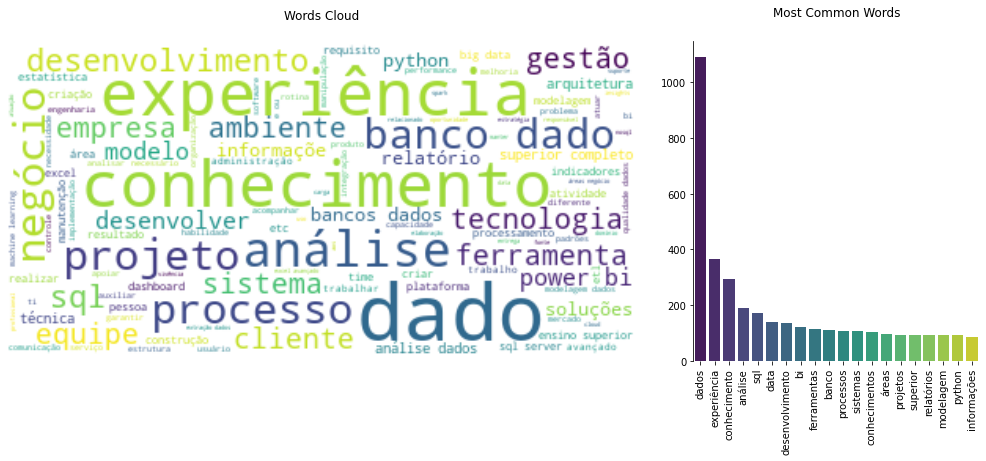

In [9]:
fig = plt.figure(figsize=(30, 20))

gs1 = gridspec.GridSpec(3, 3)
gs1.update(left=0.05, right=0.50, wspace=0.20)
ax1 = plt.subplot(gs1[-1, :-1])
wordcloud = WordCloud(max_font_size = 50,
                      background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Words Cloud', pad = 25)
sns.despine(bottom = True, left = True)
plt.axis('off')

ax2 = plt.subplot(gs1[-1, -1])
sns.barplot(data = most_commonWords[0:20], y = 'count', x = 'word', palette = 'viridis')
plt.title('Most Common Words', pad = 25)
plt.xticks(rotation = 90)
sns.despine(bottom = True)
ax2.xaxis.label.set_visible(False)
ax2.yaxis.label.set_visible(False)

## JOB ROLE

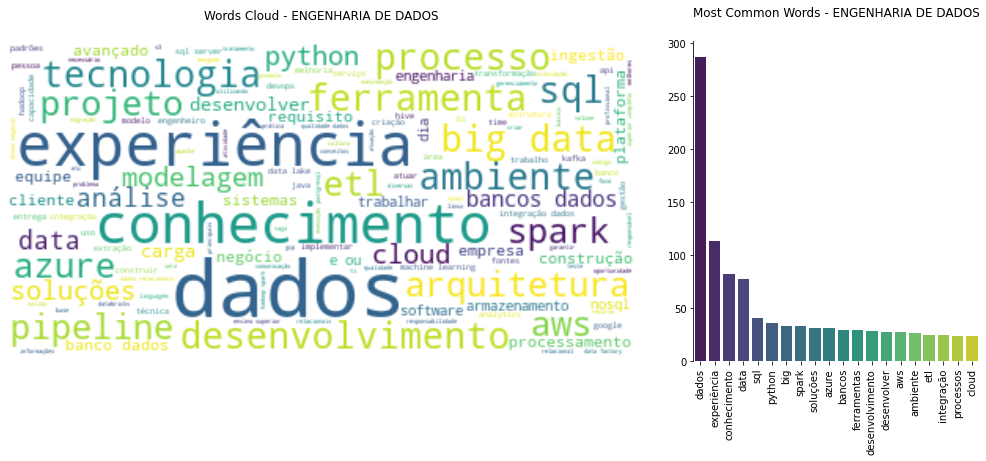

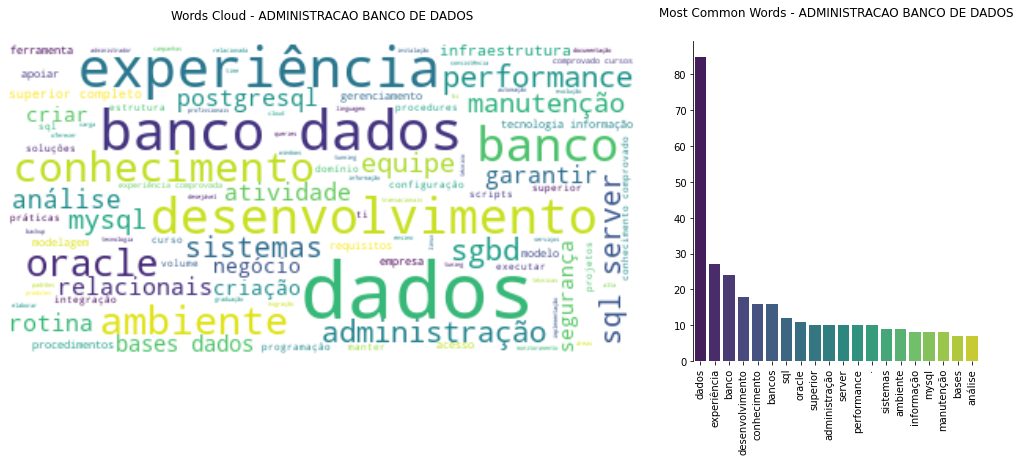

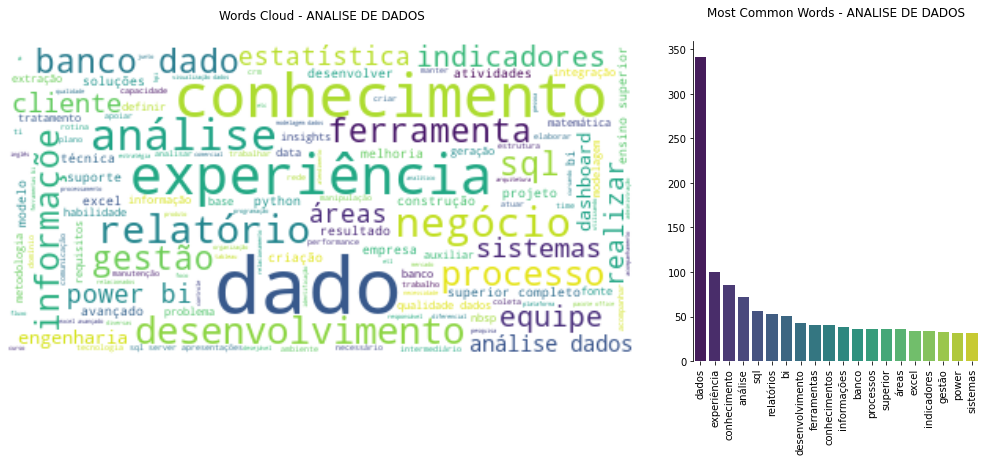

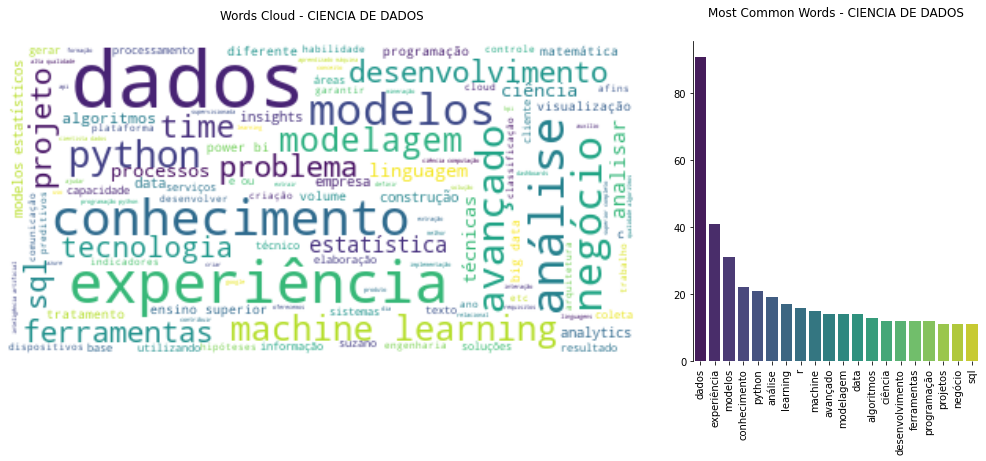

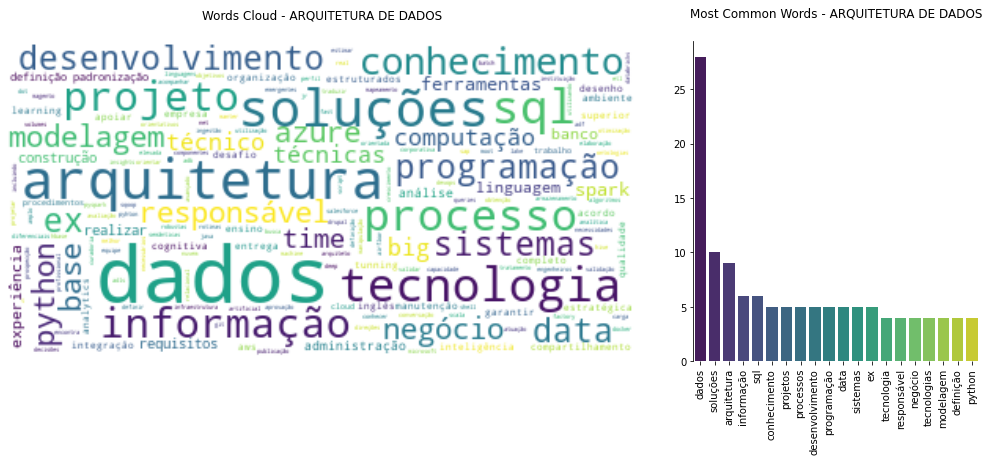

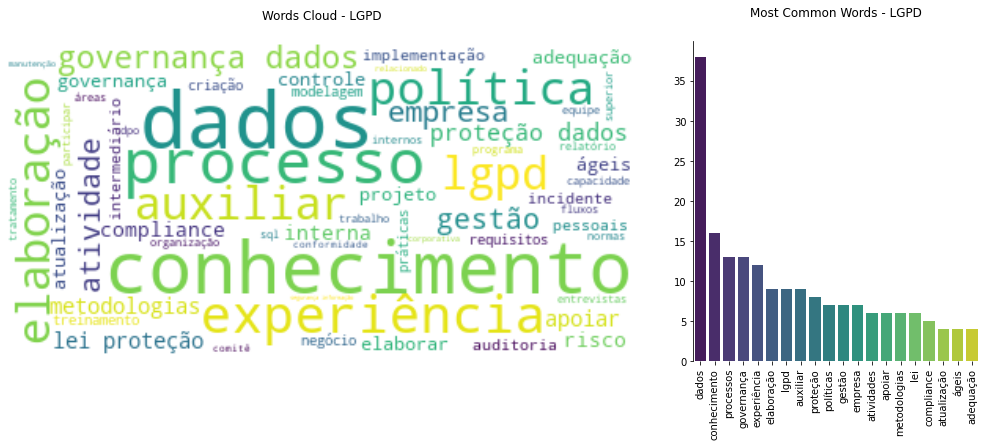

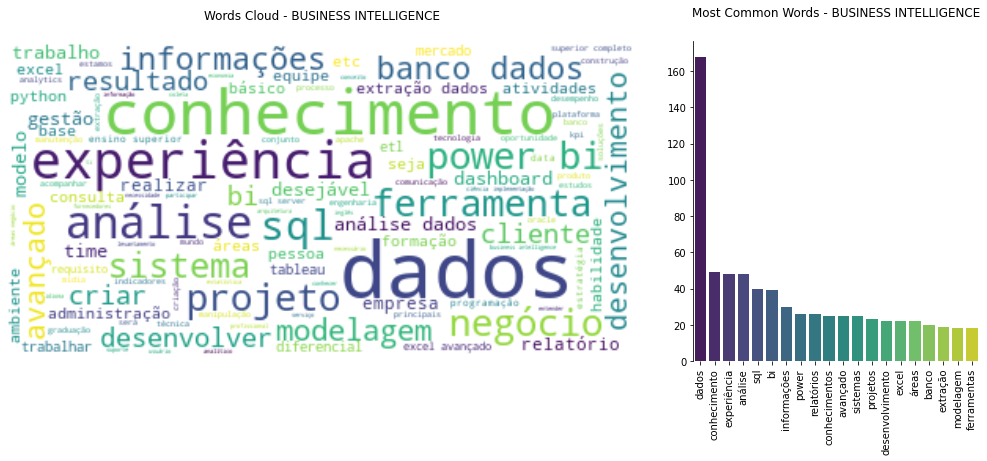

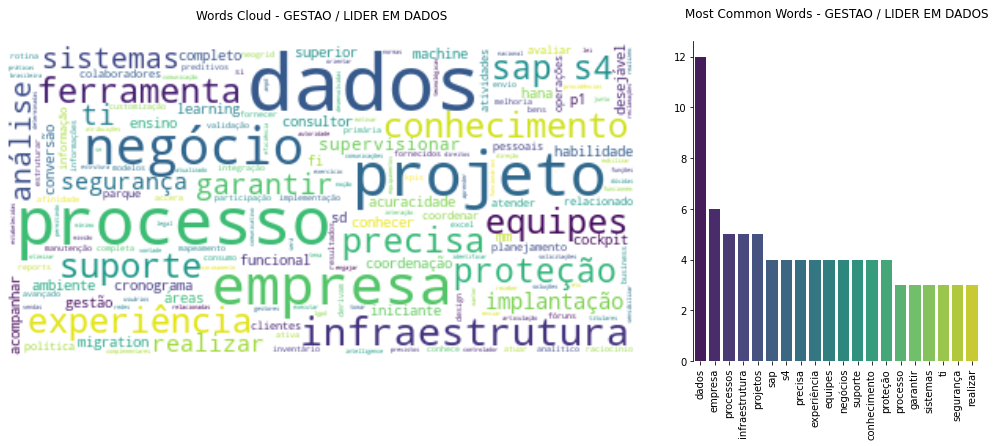

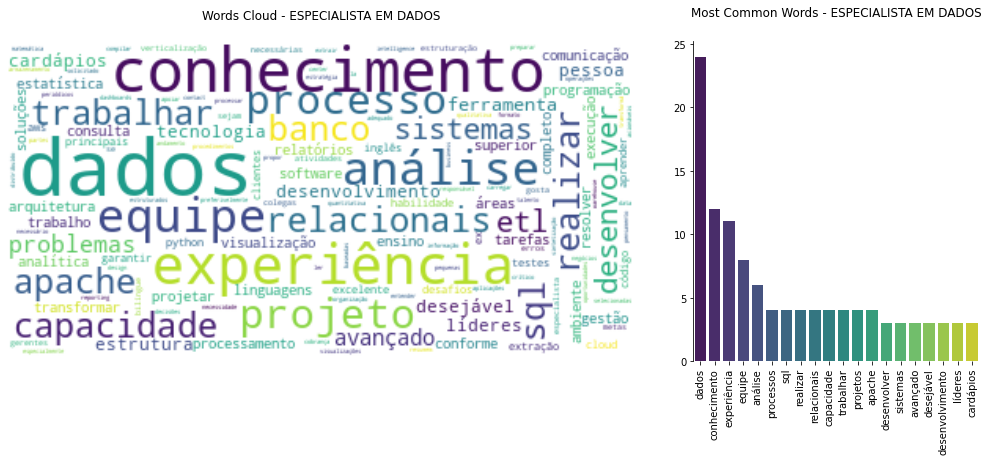

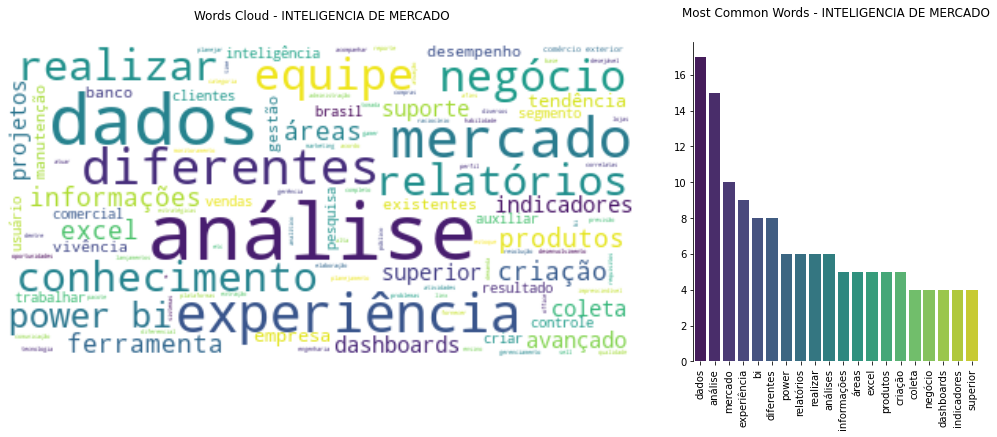

In [10]:
plot_words('posicao_vaga')

## JOB LEVEL - "SENIORITY"

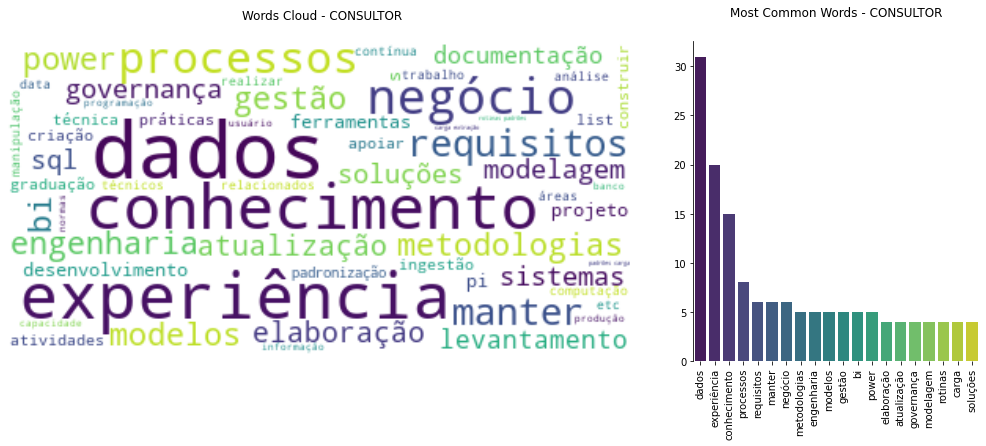

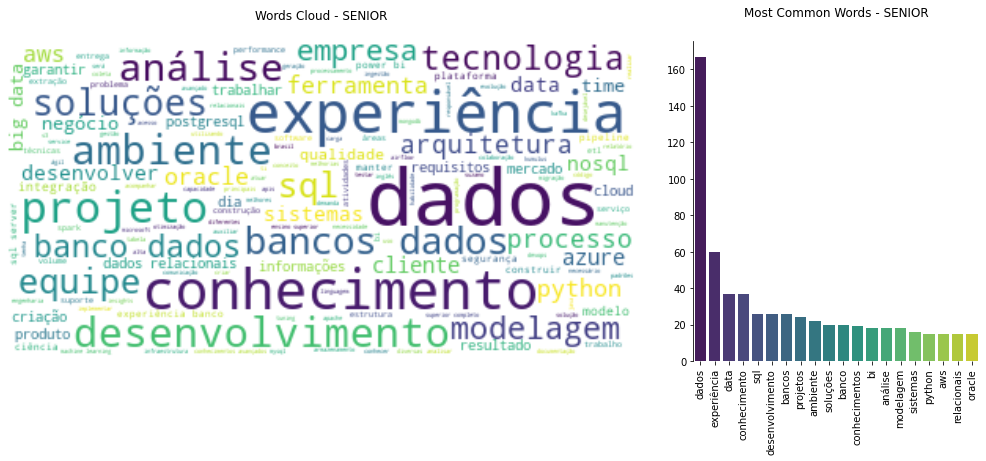

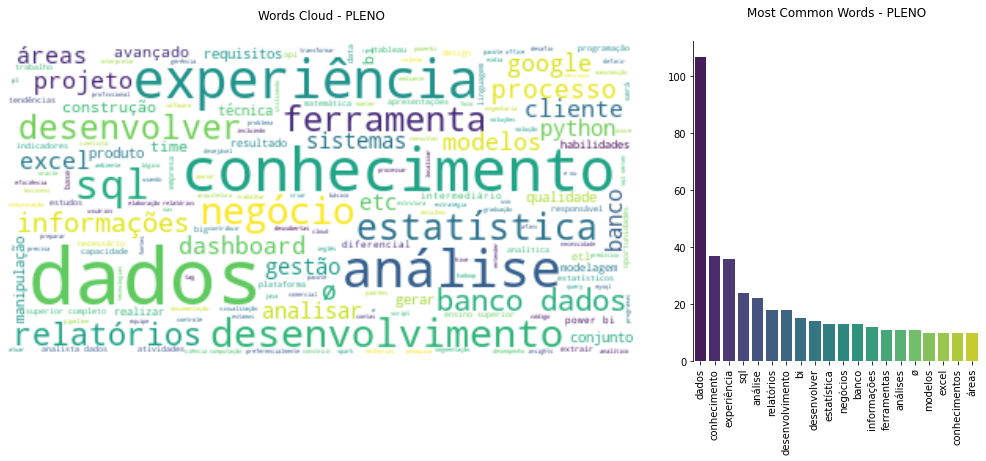

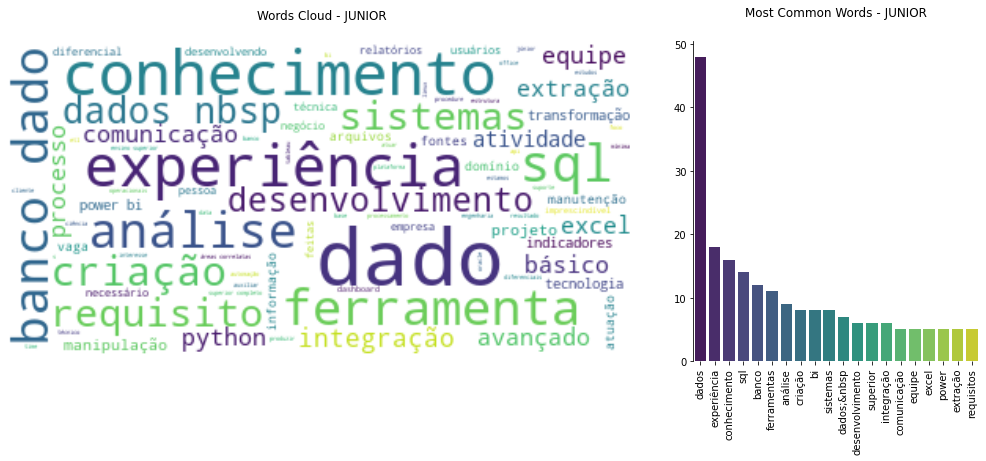

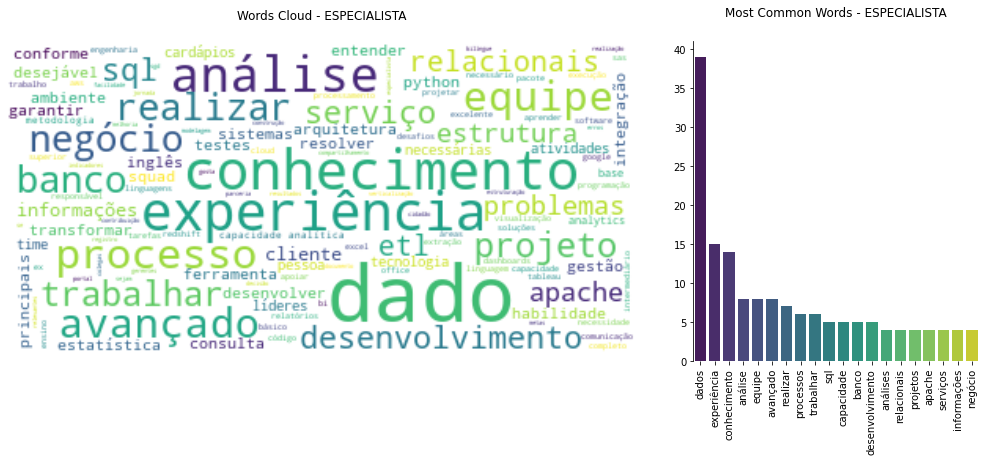

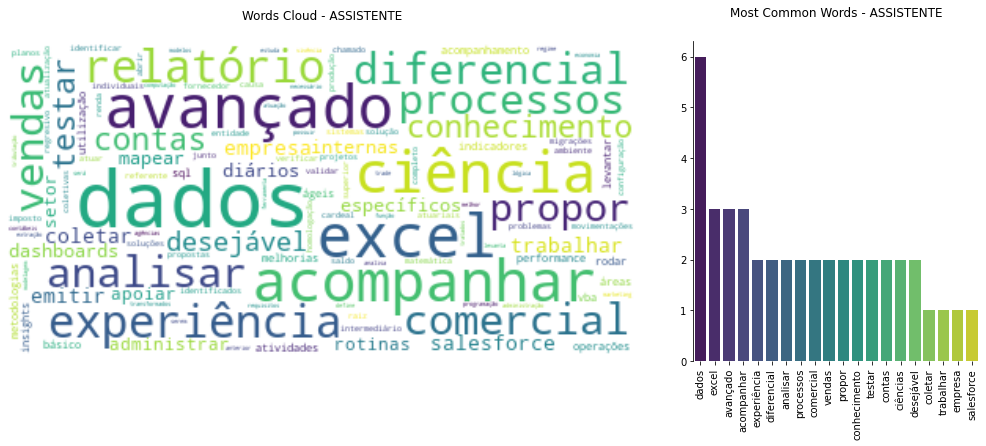

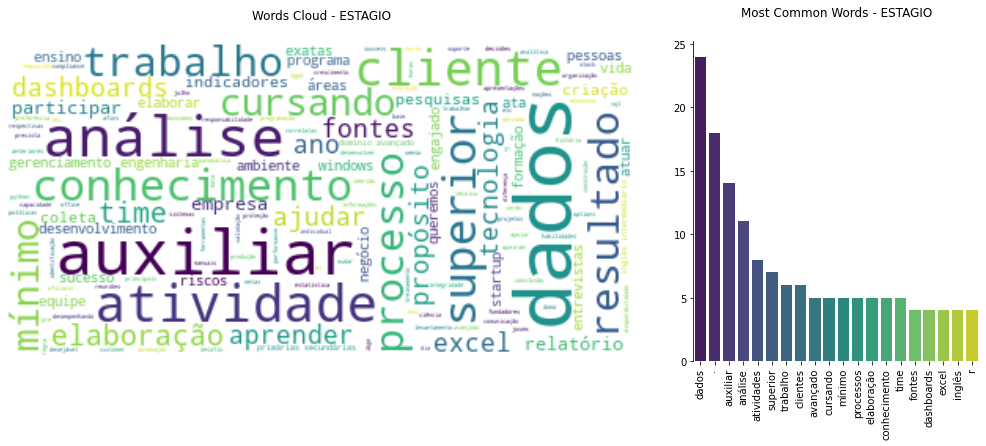

In [11]:
plot_words('nivel')

## STOP WORDS

In [12]:
#changing to portugues
pln = spacy.load('pt_core_news_sm')
pln

In [13]:
# stop words
stop_words = spacy.lang.pt.stop_words.STOP_WORDS
print(stop_words)

{'menos', 'puderam', 'estou', 'conhecida', 'aquela', 'faz', 'dez', 'cá', 'ponto', 'deste', 'numa', 'vós', 'essas', 'e', 'uma', 'dão', 'sim', 'estado', 'além', 'sou', 'vais', 'relação', 'ambas', 'cuja', 'vez', 'ora', 'nesta', 'tanta', 'nós', 'parte', 'usar', 'cento', 'bem', 'ser', 'nossas', 'tentar', 'meses', 'questão', 'nada', 'após', 'estiveram', 'seis', 'máximo', 'tendes', 'ao', 'não', 'nos', 'nossos', 'faço', 'nas', 'alguns', 'era', 'desta', 'poderá', 'fazia', 'tuas', 'suas', 'fui', 'for', 'seu', 'apenas', 'adeus', 'eles', 'essa', 'apoia', 'aqui', 'mal', 'aqueles', 'mais', 'como', 'dentro', 'apontar', 'dá', 'fazer', 'obrigada', 'temos', 'todas', 'zero', 'doze', 'deverá', 'estas', 'querem', 'posso', 'agora', 'aquele', 'nessa', 'lá', 'oitava', 'aquilo', 'outra', 'vens', 'tão', 'apoio', 'a', 'quarto', 'sob', 'embora', 'comprido', 'daquela', 'outros', 'nove', 'já', 'cujo', 'corrente', 'vinte', 'iniciar', 'és', 'forma', 'quais', 'cinco', 'terceiro', 'podem', 'dessa', 'algo', 'sempre', 't

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def pre_processamento(texto):
    texto = texto.lower()
    
    doc = pln(texto)
    lista = []
    
    for token in doc:
        lista.append(token.text) # 'tokenizacao'
    
    lista = [p for p in lista if p not in stop_words and p not in string.punctuation]
    lista = ' '.join([str(e) for e in lista if not e.isdigit()])
    
    return lista



In [16]:
txt = df['descricao_vaga'].apply(pre_processamento)

## MOST COMMON WORDS

In [17]:
most_commonWords = Counter(" ".join(df["descricao_vaga"]).split()).most_common(100)
most_commonWords = pd.DataFrame(most_commonWords, columns = ['word', 'count'])

In [18]:
most_commonWords.head(30)

word  count
0             dados   1092
1       experiência    367
2      conhecimento    295
3           análise    191
4               sql    174
5              data    140
6   desenvolvimento    135
7                bi    121
8       ferramentas    114
9             banco    111
10        processos    106
11         sistemas    106
12    conhecimentos    103
13            áreas     96
14         projetos     95
15         superior     95
16       relatórios     94
17        modelagem     93
18           python     92
19      informações     88
20         soluções     86
21         avançado     86
22          negócio     81
23           gestão     78
24          modelos     78
25            power     77
26      desenvolver     73
27         negócios     71
28           bancos     70
29           equipe     68

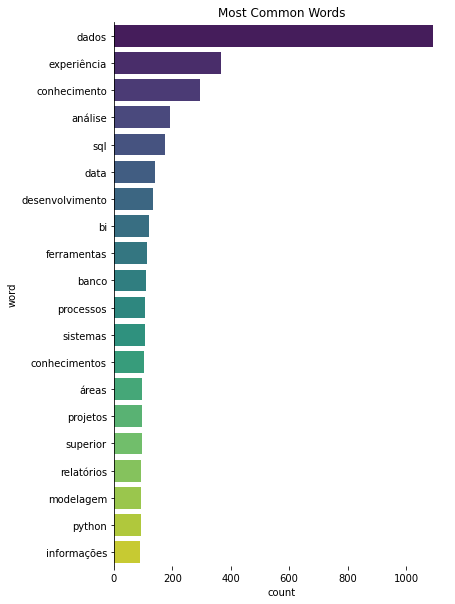

In [19]:
# most common words
# General
most_commonWords = Counter(" ".join(df["descricao_vaga"]).split()).most_common(100)
most_commonWords = pd.DataFrame(most_commonWords, columns = ['word', 'count'])


f, ax = plt.subplots(figsize=(6, 10))

ax = sns.barplot(data = most_commonWords[0:20], x = 'count', y = 'word', palette = 'viridis')
plt.title('Most Common Words')
sns.despine(bottom = True)
